In [1]:
from keras.models import load_model

model = load_model("./model_file/cats_and_dogs_small_2.h5")
model.summary()

2022-04-20 09:03:21.583522: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-20 09:03:21.615930: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-20 09:03:21.616156: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-20 09:03:21.617319: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

In [2]:
img_path = "./Dataset/cats-vs-dogs/test/cats/1700.jpg"

from tensorflow.keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

print(img_tensor.shape)

(1, 150, 150, 3)


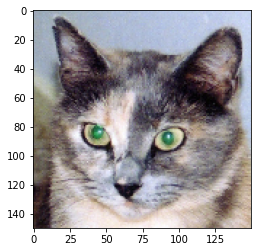

In [3]:
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()

In [4]:
from keras import models

layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs = layer_outputs)

In [5]:
activations = activation_model.predict(img_tensor)

2022-04-20 09:03:25.571267: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8202


In [6]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 148, 148, 32)


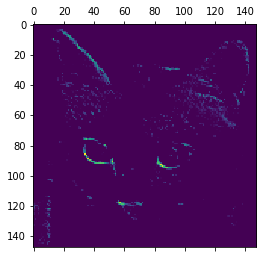

In [7]:
import matplotlib.pyplot as plt

plt.matshow(first_layer_activation[0, :, :, 19], cmap = "viridis")

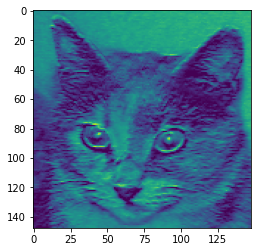

In [8]:
plt.imshow(first_layer_activation[0, :, :, 15], cmap="viridis")

MemoryError: Unable to allocate 368. TiB for an array with shape (85525504, 591872) and data type float64

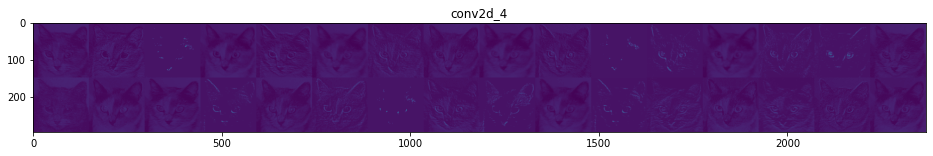

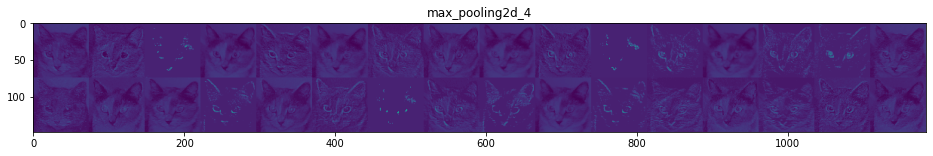

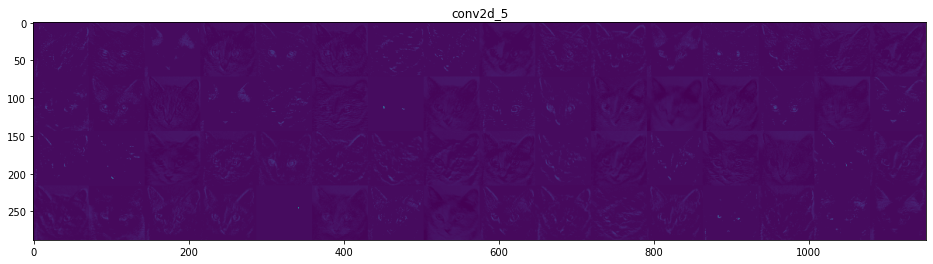

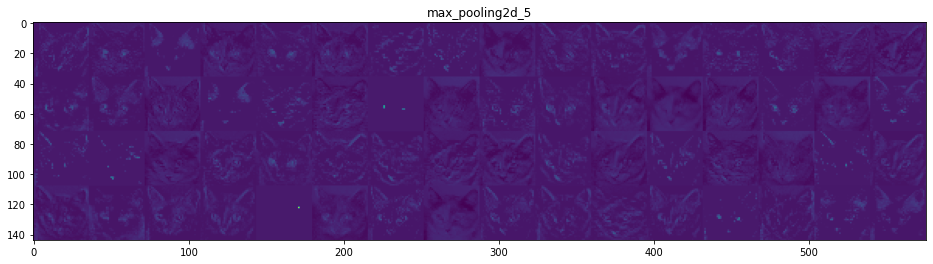

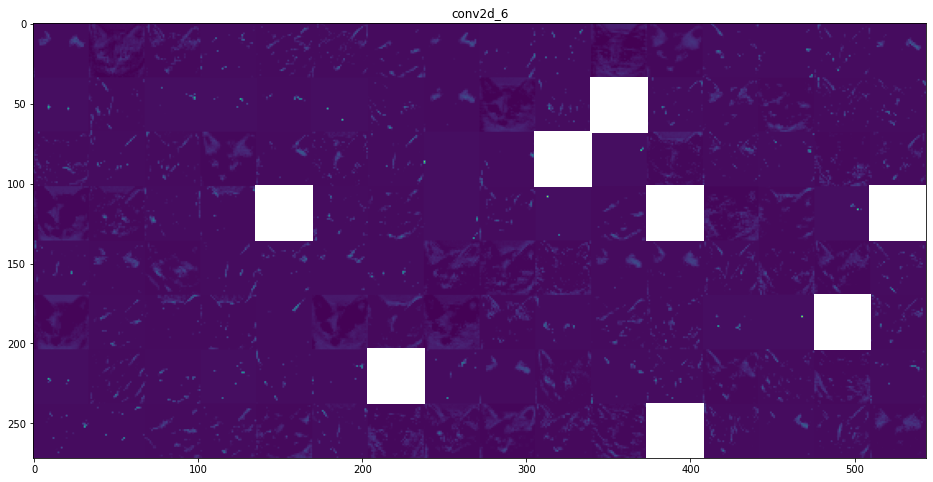

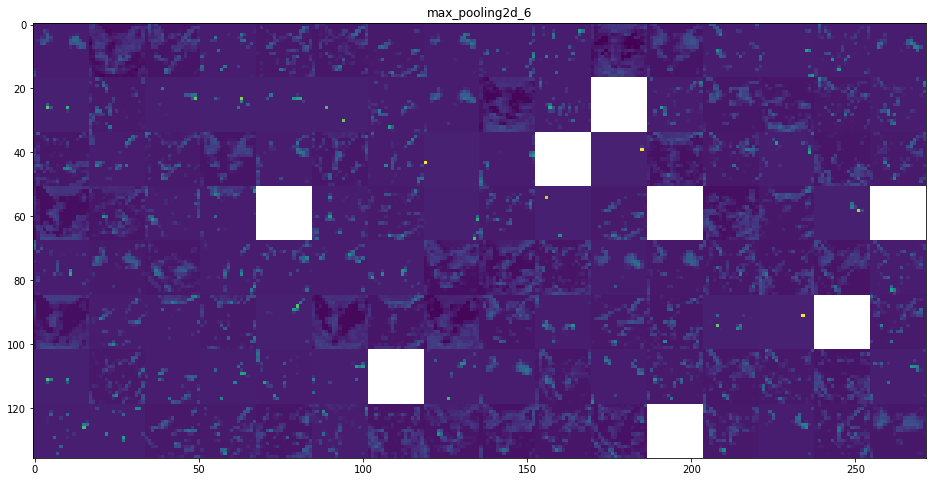

In [10]:
layer_names = []
for layer in model.layers[:8]:
      layer_names.append(layer.name)
      
images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
      n_features = layer_activation.shape[-1]
      
      size = layer_activation.shape[1]
      
      n_cols = n_features // images_per_row
      display_grid = np.zeros((size * n_cols, images_per_row * size))
      
      for col in range(n_cols):
            for row in range(images_per_row):
                  channel_image = layer_activation[0, :, :, col * images_per_row + row]
                  channel_image -= channel_image.mean()
                  channel_image /= channel_image.std()
                  channel_image *= 64
                  channel_image += 128
                  channel_iamge = np.clip(channel_image, 0, 255).astype("uint8")
                  display_grid[col * size : (col + 1) * size,
                               row * size : (row + 1) * size] = channel_image
                  
      scale = 1./size
      plt.figure(figsize = (scale * display_grid.shape[1],
                            scale * display_grid.shape[0]))
      plt.title(layer_name)
      plt.grid(False)
      plt.imshow(display_grid, aspect="auto", cmap="viridis")
      
plt.show()

컨브넷 필터 시각화하기

In [11]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import backend as K

model = VGG16(weights = "imagenet",
              include_top = False)

layer_name = "block3_conv1"
filter_index = 0

layer_output = model.get_layer(layer_name).output
loss = K.mean(layer_output[:, :, :, filter_index])

In [15]:
grad = K.gradients(loss, model.input)[0]

RuntimeError: tf.gradients is not supported when eager execution is enabled. Use tf.GradientTape instead.